In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [120]:
data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [121]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [122]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [123]:
data.shape

(729322, 11)

In [124]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [125]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [126]:
data[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(10)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,id1918069,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,id2429028,2016-04-20 20:30:14,2016-04-20 20:36:51,N
7,id1663798,2016-06-19 16:48:14,2016-06-19 17:06:35,N
8,id2436943,2016-03-28 19:17:03,2016-03-28 19:48:29,N
9,id2933909,2016-04-10 22:01:41,2016-04-10 22:25:30,N


In [127]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [128]:
data['pickup_datetime']=pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime']=pd.to_datetime(data.dropoff_datetime)
data['store_and_fwd_flag']=1*(data.store_and_fwd_flag.values=='Y')
data['check_trip_duration']=(data['dropoff_datetime']-data['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference=data[np.abs(data['check_trip_duration'].values-data['trip_duration'].values)>1]
duration_difference.shape

(0, 12)

In [129]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

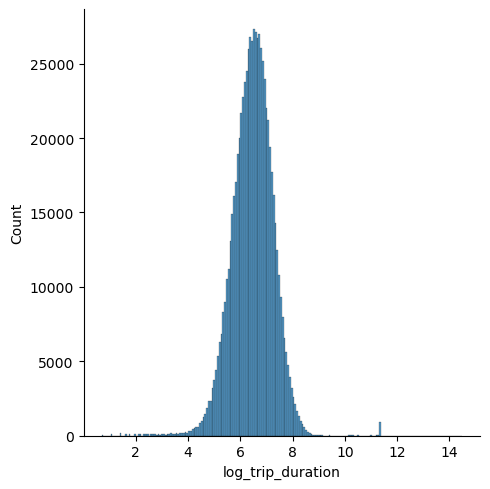

In [130]:
data['log_trip_duration']=np.log(data['trip_duration'].values+1)
sns.displot(data['log_trip_duration'],kde=False,bins=200)

Text(0, 0.5, 'Frequency')

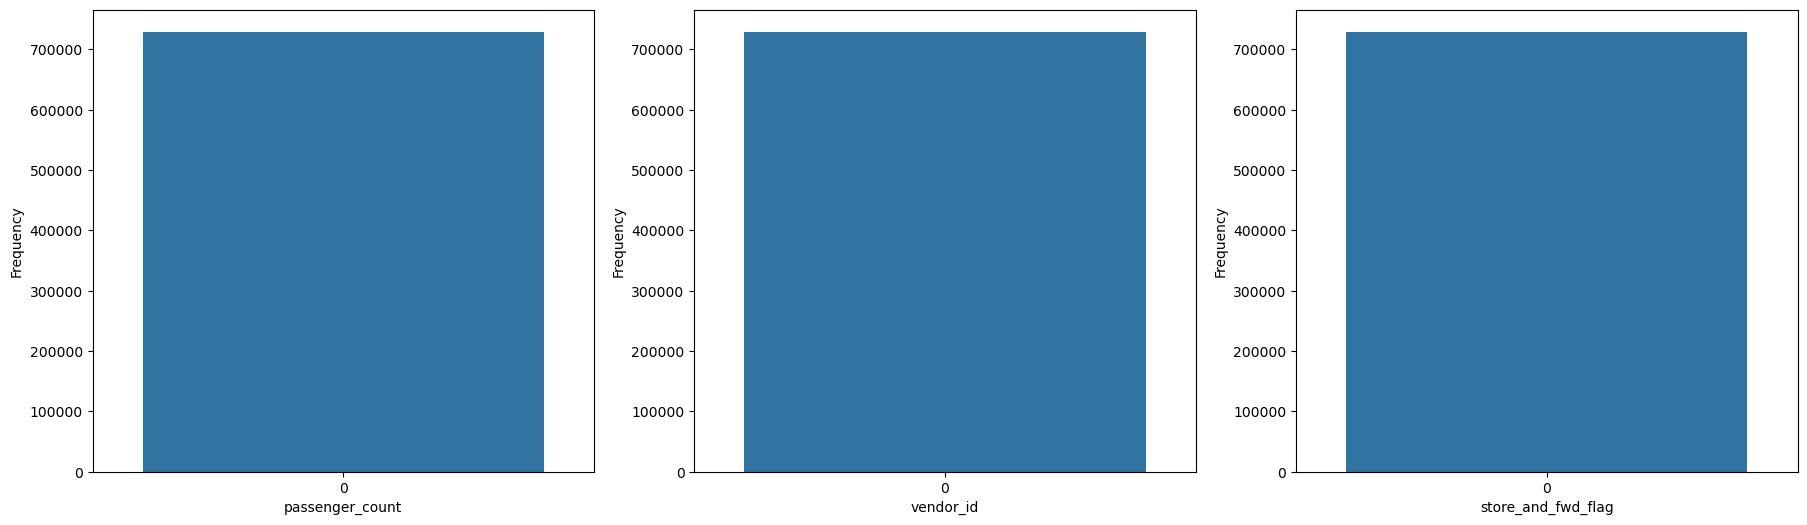

In [131]:
plt.figure(figsize=(22,6))
plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('passenger_count')
plt.ylabel('Frequency')
plt.subplot(132)
sns.countplot(data['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')
plt.subplot(133)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')


In [132]:
data['pickup_datetime'].min(),data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [133]:
data['day_of_week']=data['pickup_datetime'].dt.weekday
data['hour_of_day']=data['pickup_datetime'].dt.hour

Text(0, 0.5, 'Total_Number_of_pickups')

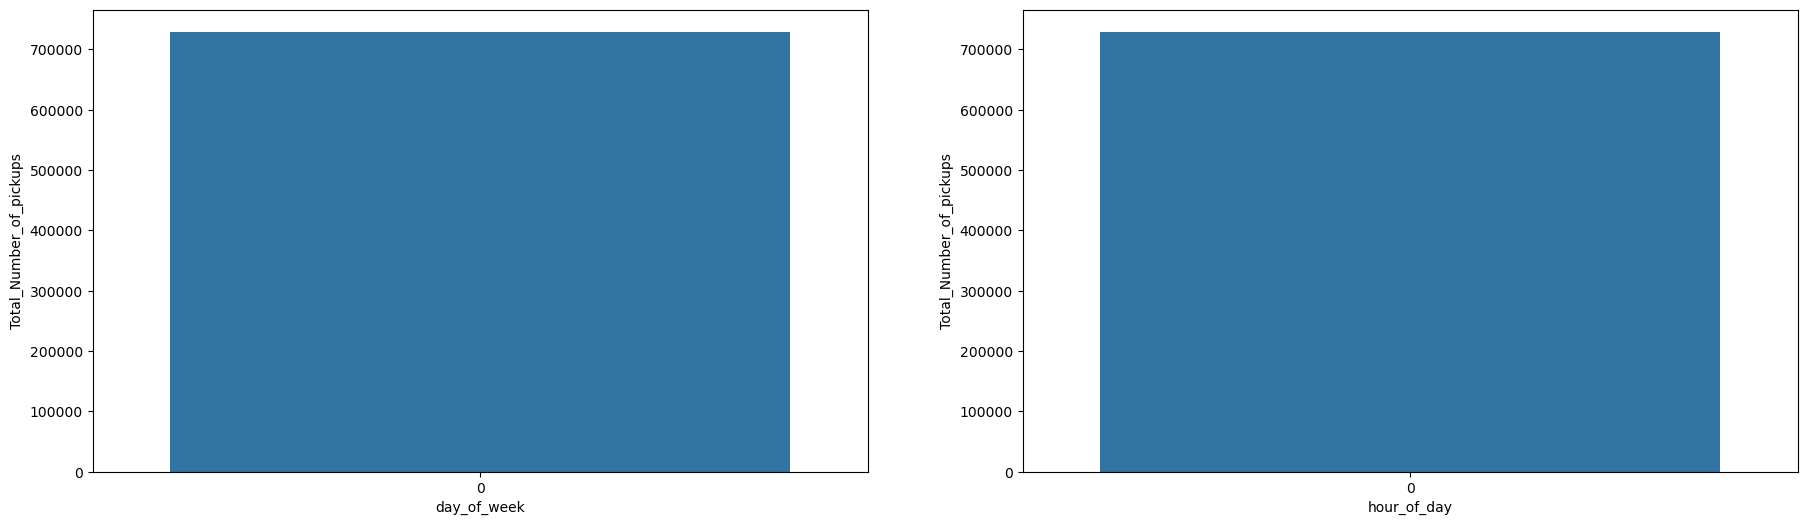

In [134]:
plt.figure(figsize=(22,6))

plt.subplot(121)
sns.countplot(data['day_of_week'])
plt.xlabel('day_of_week')
plt.ylabel('Total_Number_of_pickups')

plt.subplot(122)
sns.countplot(data['hour_of_day'])
plt.xlabel('hour_of_day')
plt.ylabel('Total_Number_of_pickups')


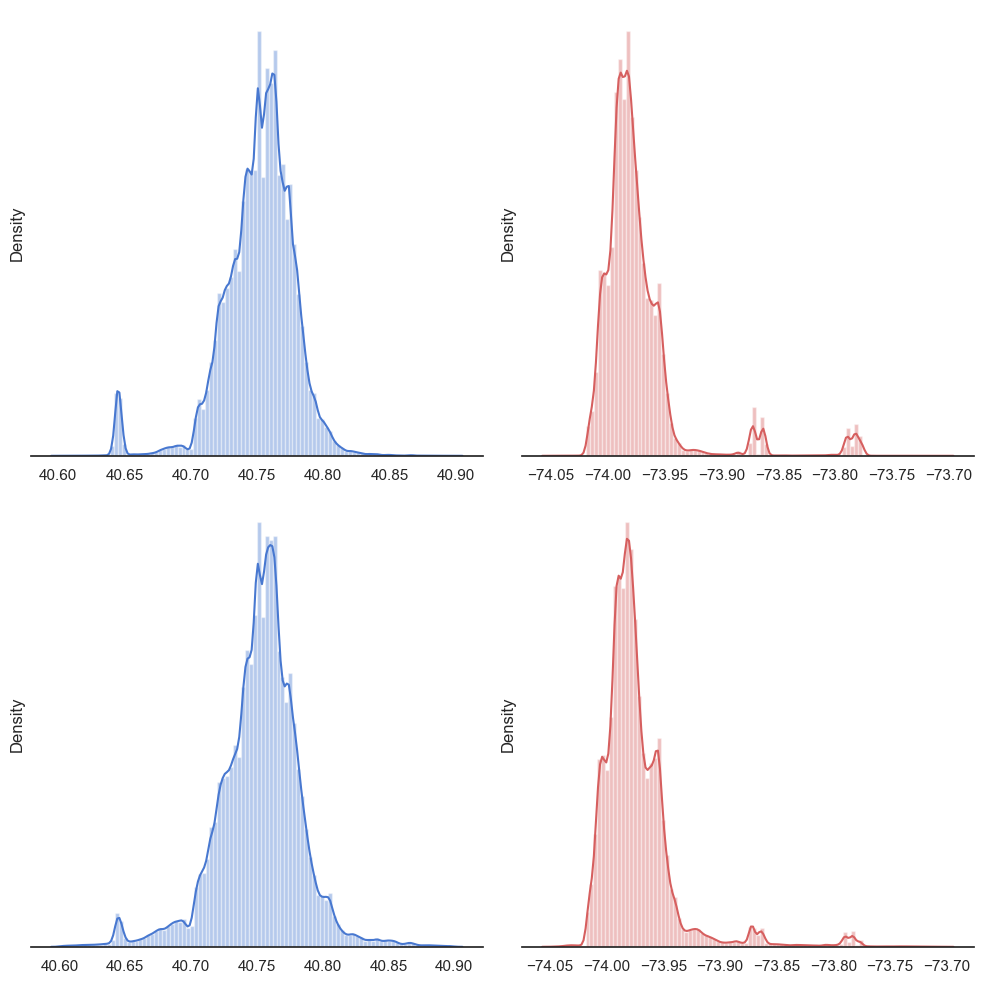

In [136]:
data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
data_data_new = data.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(data_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(data_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(data_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(data_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [138]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'log_trip_duration',
       'day_of_week', 'hour_of_day'],
      dtype='object')